Phase 1: Initial Dataset understanding and setting up.

In [1]:
import pandas as pd 
file_path = '../data/online_retail_II.xlsx'
df = pd.read_excel(file_path)
print("Successfully loaded he data. First 5 rows are as follows")
df.head()


Successfully loaded he data. First 5 rows are as follows


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [3]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


Phase 2: Data Cleaning & Feature Engineering.

In [5]:
df_clean = df.copy()
print(f"Original Number of rows: {len(df_clean)}")
df_clean.dropna(subset=['Customer ID'], inplace = True)
print(f"Number of rows after droping null customer IDs: {len(df_clean)}")
df_clean['Customer ID'] = df_clean['Customer ID'].astype(int)
df_clean.info()

Original Number of rows: 525461
Number of rows after droping null customer IDs: 417534
<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  int64         
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 28.7+ MB


In [16]:
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['Price'] > 0]
print(f"Number of rows after removing negative quantity and price: {len(df_clean)}")
print(f"\nMinimum Quantity after cleaning: {df_clean['Quantity'].min()}")
print(f"\nMinimum Price after cleaning: {df_clean['Price'].min()}")
print(f"\nMiimum Quantity and Price after cleaning: {df_clean[['Quantity', 'Price']].min()}")
df_clean.describe()

Number of rows after removing negative quantity and price: 407664

Minimum Quantity after cleaning: 1

Minimum Price after cleaning: 0.001

Miimum Quantity and Price after cleaning: Quantity    1.000
Price       0.001
dtype: float64


,Quantity,InvoiceDate,Price,Customer ID
count,407664.000000,407664,407664.000000,407664.000000
mean,13.585585,2010-07-01 10:15:11.871688192,3.294438,15368.592598
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:47:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.840747,NaN,34.757965,1679.762138


In [17]:
df_clean['TotalPrice'] = df_clean['Quantity']*df_clean['Price']
df_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


In [27]:
import datetime as dt
snapshot_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Using snapshot sate: {snapshot_date}")
rfm_df = df_clean.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
})
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'Invoice': 'Frequency',
                       'TotalPrice': 'Monetary'}, inplace=True)
rfm_df.head()


Using snapshot sate: 2010-12-10 20:01:00


,Recency,Frequency,Monetary
Customer ID,,,
12346,165,11,372.86
12347,3,2,1323.32
12348,74,1,222.16
12349,43,3,2671.14
12351,11,1,300.93


Phase 3: Unsupervised Segmentation (Finding the Groups)

In [28]:
from sklearn.preprocessing import StandardScaler
rfm_for_scaling = rfm_df.copy()
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_scaling)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)
print("Scaled RFM Data:")
rfm_scaled_df.head()



Scaled RFM Data:


,Recency,Frequency,Monetary
Customer ID,,,
12346,0.762299,0.801087,-0.187961
12347,-0.910402,-0.300603,-0.081329
12348,-0.177305,-0.423013,-0.204868
12349,-0.497389,-0.178193,0.069883
12351,-0.827799,-0.423013,-0.196031


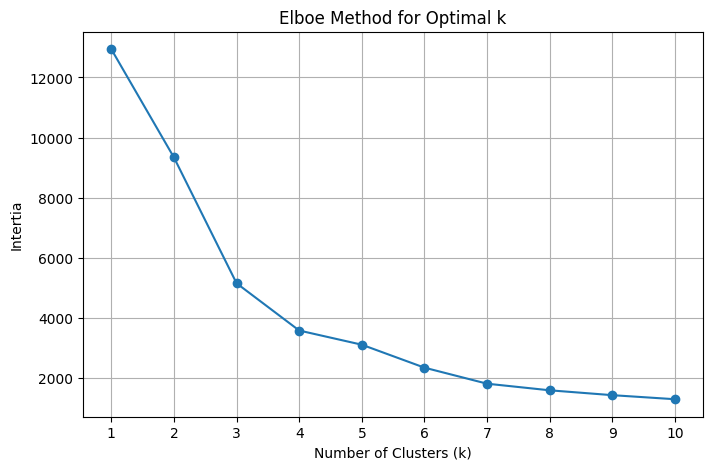

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = {}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(rfm_scaled_df)
    inertia[k] = kmeans.inertia_

plt.figure(figsize=(8,5))
plt.plot(list(inertia.keys()), list(inertia.values()), marker = 'o')
plt.title('Elboe Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Intertia')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()


In [41]:
optimal_k = 4
kmeans =KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(rfm_scaled_df)

rfm_df['Cluster']= kmeans.labels_

print("RFM Data with Cluster Labels:")
rfm_df.head()


cluster_profile = rfm_df.groupby('Cluster').agg({
    'Recency' : 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

print("\nCluster Profiles (Average RFM values):")
cluster_profile

RFM Data with Cluster Labels:

Cluster Profiles (Average RFM values):


,Recency,Frequency,Monetary
Cluster,,,
0,42.996882,4.469598,1743.129790
1,242.976122,1.659981,596.884493
2,5.600000,113.600000,215543.670000
3,15.433962,48.547170,29040.181566


Phase 4: Supervised Churn Prediction

In [44]:
import numpy as np 

churn_threshold = 90

rfm_df['Churn'] = np.where(rfm_df['Recency'] > churn_threshold, 1, 0)
rfm_df.head()

print("Churn Distribution:")
print(rfm_df['Churn']. value_counts())

Churn Distribution:
Churn
0    2877
1    1435
Name: count, dtype: int64


In [46]:
X = rfm_df[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = rfm_df['Churn']

print("\nFeatures (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
             Recency  Frequency  Monetary  Cluster
Customer ID                                       
12346            165         11    372.86        1
12347              3          2   1323.32        0
12348             74          1    222.16        0
12349             43          3   2671.14        0
12351             11          1    300.93        0

Target (y):
Customer ID
12346    1
12347    0
12348    0
12349    0
12351    0
Name: Churn, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3449, 4)
Testing data shape: (863, 4)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       287

    accuracy                           1.00       863
   macro avg       1.00      1.00      1.00       863
weighted avg       1.00      1.00      1.00       863


Confusion Matrix:


/Users/rahul/Projects/ecommerce-customer-segmentation/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


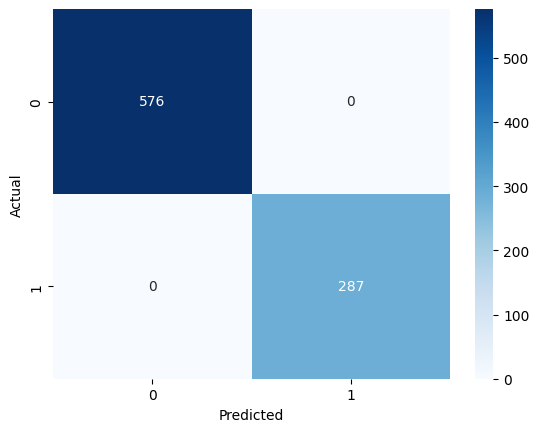

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib

rfm_df.to_csv('rfm_customer_data.csv')
print("Saved rfm_customer_data.csv successfully!")


joblib.dump(kmeans, 'kmeans_model.joblib')
print("Saved kmeans_model.joblib successfully!")


artifacts = {
    'model': model,
    'scaler': scaler
}
joblib.dump(artifacts, 'churn_artifacts.joblib')
print("Saved churn_artifacts.joblib successfully!")

Saved rfm_customer_data.csv successfully!
Saved kmeans_model.joblib successfully!
Saved churn_artifacts.joblib successfully!
